In [2]:
#database_IND

# Problem Statement:


### Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

### Key attributes of the database

The database includes the following indicators:

`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]

`country_long` (text): longer form of the country designation

`name` (text): name or title of the power plant, generally in Romanized form

`gppd_idnr` (text): 10 or 12 character identifier for the power plant

`capacity_mw` (number): electrical generating capacity in megawatts

`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

`primary_fuel` (text): energy source used in primary electricity generation or export

`other_fuel1` (text): energy source used in electricity generation or export

`other_fuel2` (text): energy source used in electricity generation or export

`other_fuel3` (text): energy source used in electricity generation or export

`commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available

`owner` (text): majority shareholder of the power plant, generally in Romanized form

`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form

`url` (text): web document corresponding to the `source` field

`geolocation_source` (text): attribution for geolocation information

`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.

`year_of_capacity_data` (number): year the capacity information was reported

`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013

`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014

`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015

`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016

`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017

`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018

`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019

`generation_data_source` (text): attribution for the reported generation information

`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013

`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 

`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 

`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 

`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 

'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013

`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 

`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015

`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016

`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

## Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 

### Prediction :   Make two prediction

1) Primary Fuel

2) capacity_mw 

In [3]:
###https://github.com/wri/global-power-plant-database/blob/master/source_databases_csv/database_IND.csv

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
# Filtering warnings
import warnings 
warnings.filterwarnings('ignore')

In [5]:
#Read CSV File
pwr_plnt_df=pd.read_csv('database_IND.csv')

In [6]:
pwr_plnt_df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [7]:
pwr_plnt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

### Observation :
Dataset have 908 rows and 25 columns.

Some of feature are with object datatypes and other with float.

other_fuel3,estimated_generation_gwh,wepp_id,other_fuel2 are empty columns.

### Statistical Analysis
first of all check integrity of data & Missing value

then Data Integrity Check

Let's check if any whitespace,'?' 'NA' or '-' exist in dataset.

In [8]:
pwr_plnt_df.isin([' ','NA','-','?']).sum().any()

False

### Observation:
No any whitespaces, NA, '-' available in dataset.

### Here dataset is large, Let's check for any entry which is repeated or duplicated in dataset. 

In [9]:
# Now going to check if any duplicate entry or duplicate row with same value exist
pwr_plnt_df.duplicated().sum() 

0

### Observation:
    
    
No Duplicate Entry Present in data.

dataset head needed lot of data cleaning operation and also need to done before performing any EDA and ML modelling.


At first sight we can come across following observation in CSV file:

Lot of missing data in certain columns.
Lot of Non relevant data like gppd_idnr,url.
and many more.
At end data need to clean and we will try to do some feature engineering afterwards to modify some columns.

### Start with looking at missing value. 

Before checking null value and missing value imputation , first remove empty columns and non relevalent columns.

Columns we are going remove are :

estimated_generation_gwh - Empty
wepp_id - Empty
other_fuel2 - 98% data missing
other_fuel3 - Empty
owner - More than 60 % data missing
year_of_capacity_data - Missing data with single unique value
country - non relevalent info
country_long - non relevalent info
gppd_idnr -non relevalent info
url - No missing value but of no use

In [10]:
pwr_plnt_df.drop(columns=["country","country_long",'url','year_of_capacity_data',
                 'gppd_idnr','owner','other_fuel3','other_fuel2',
                 'estimated_generation_gwh','wepp_id'],axis=1,inplace=True)

In [11]:
#Finding what percentage of data is missing from the dataset
missing_values = pwr_plnt_df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(pwr_plnt_df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                        Missing Values  % Missing data
generation_gwh_2019                907      100.000000
generation_gwh_2013                907      100.000000
other_fuel1                        709       78.169791
generation_gwh_2014                509       56.119074
generation_gwh_2015                485       53.472988
generation_gwh_2016                473       52.149945
generation_gwh_2017                467       51.488423
generation_gwh_2018                459       50.606395
generation_data_source             458       50.496141
commissioning_year                 380       41.896362
latitude                            46        5.071665
longitude                           46        5.071665
geolocation_source                  19        2.094818
capacity_mw                          0        0.000000
source                               0        0.000000
primary_fuel                         0        0.000000
name                                 0        0.000000


#### Proposed Strategy to Handle Missing data :

- As Geolocation source is categorical data we can impute it with mode of category.
- longitude and latitude can be impute with mean or median of longitude and latitude. This imputation will not distrub statstical balance of data as mean will be same at the end.
- As commissioning year for most of industrial powerplant is missing(40%) after checking correlation we will decide to keep or drop this features.
- In generation_data_source 50% data is missing and it doesnot have any importance in our analysis. So it is better to drop this feature.
- There are 5 Different columns of GenerationGW-Hours for year 2013 to 2017. Its dive into it further
    - It is important feature in for coal and hydro powerplant.
    - It is natural to have missing data in this category. As Oil,Gas based Powerplant operated in intermitant periodic way and some renewable powerplant like wind,tide are operated seasonaly.
    - Some new powerplant commission between 2013 and 2018. For these powerplant some data will definitely available.
    - We cannot do any mean or median imputation here as different powerplant have different generation capacity & Generation per year depend on runtime of powerplant.
    - We all know old powerplant normally kept off unless more demand of generation required. Reason to kept is low efficiency & high operating cost.
    - We can neglect real value data for such important feature. We will keep this feature along with missing value and perform further investigation.
- Other_fuel1 is another feature of some importance with missing value. Lets dive into it :
    - Not every powerplant build to work with alternate fuel.
    - Idea of other fuel is totally irrelevant to renewable energy source based powerplant like solar,wind,hydro.
    - First talk about powerplant for which concept of other fuel is applicable. We can impute them based domain knowledge.
        - Alternate Fuel of Coal based powerplant mostly is Oil or cogeneration.
        - Alternate Fuel of Industrial Oil based powerplant is Gas.
        - Alternate Fuel of Industrial Gas based powerplant is Oil.
        - We cannot define any alternative fuel for nuclear powerplant as it sole based on plant design & so many option.
    - For Renewable energy source based powerplant no alternate fuel needed. As it is categorical feature we can impute these powerplant with "Not Applicable". At end we are going Encoding these labels, 'Not Applicable' will be just one other additional label in encoding. Making no alternation on final result.

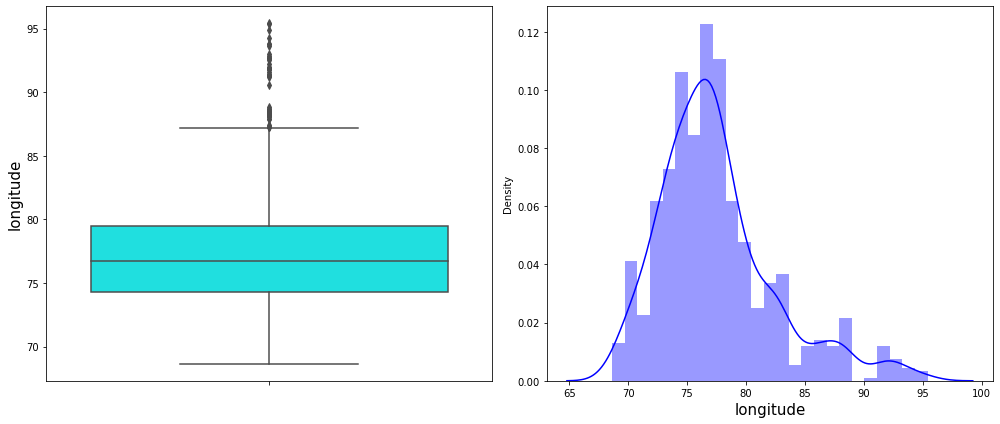

In [13]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='longitude', data=pwr_plnt_df,color='cyan')
plt.ylabel('longitude',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(pwr_plnt_df['longitude'], color='b')
plt.xlabel('longitude',fontsize=15)
plt.tight_layout()
plt.show()

<b> Based on presense of outliers we will impute longitude we with median. </b>

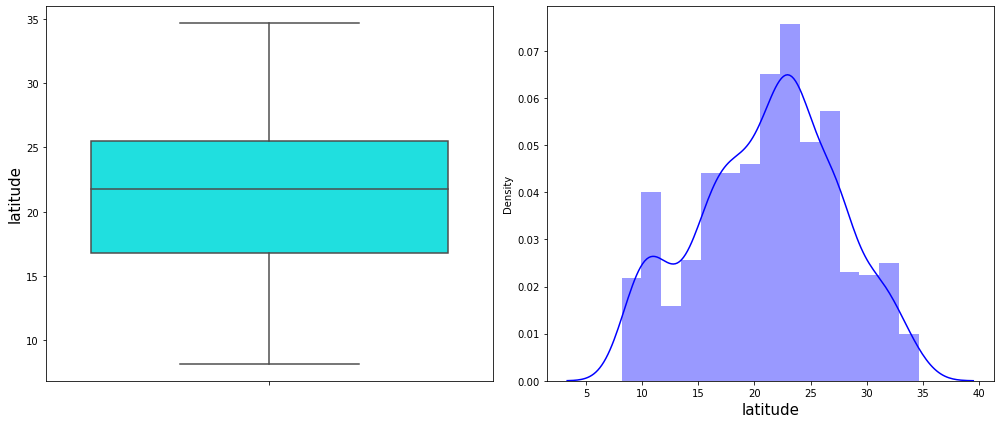

In [15]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='latitude', data=pwr_plnt_df,color='cyan')
plt.ylabel('latitude',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(pwr_plnt_df['latitude'], color='b')
plt.xlabel('latitude',fontsize=15)
plt.tight_layout()
plt.show()

In [16]:
# Missing Value Imputation of geolocation with mode
pwr_plnt_df['geolocation_source'] = pwr_plnt_df['geolocation_source'].fillna(pwr_plnt_df['geolocation_source'].mode()[0])
# Missing Value Imputation of longitude with median
pwr_plnt_df['longitude'] = pwr_plnt_df['longitude'].fillna(pwr_plnt_df['longitude'].median())
# Missing Value Imputation of latitude with mean
pwr_plnt_df['latitude'] = pwr_plnt_df['latitude'].fillna(pwr_plnt_df['latitude'].mean())

In [17]:
#Finding what percentage of data is missing from the dataset
missing_values = pwr_plnt_df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(pwr_plnt_df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                        Missing Values  % Missing data
generation_gwh_2019                907      100.000000
generation_gwh_2013                907      100.000000
other_fuel1                        709       78.169791
generation_gwh_2014                509       56.119074
generation_gwh_2015                485       53.472988
generation_gwh_2016                473       52.149945
generation_gwh_2017                467       51.488423
generation_gwh_2018                459       50.606395
generation_data_source             458       50.496141
commissioning_year                 380       41.896362
name                                 0        0.000000
capacity_mw                          0        0.000000
source                               0        0.000000
primary_fuel                         0        0.000000
longitude                            0        0.000000
latitude                             0        0.000000
geolocation_source                   0        0.000000


### Statstical Matrix

In [18]:
pwr_plnt_df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
count,907.000000,907.000000,907.000000,527.000000,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0
mean,326.223755,21.197918,77.427103,1997.091082,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN
std,590.085456,6.079148,4.815073,17.082868,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN
min,0.000000,8.168900,68.644700,1927.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.725000,17.072000,74.388900,1988.000000,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN
50%,59.200000,21.281800,76.719500,2001.000000,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN
75%,385.250000,25.176450,79.206100,2012.000000,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN
max,4760.000000,34.649000,95.408000,2018.000000,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN


### Observation:
    
Bigest Powerplant has power generation capacity of 4760 MW.

In each Generation-GWHours columns Mean is greater than Median.

Powerplants are located in latitude range of 8.1689 to 34.6490 while longitudal range is 68.64 to 95.4080.

Oldest powerplant commission date back to 1927 and most recent powerplant is build in 2018. We will check in which timeframe most of powerplants are commission.

Median of capacity MW is 60 MW. This suggest that there are lot of small capacity powerplant in dataset.

We have two different Target feature for regression and classification model. LetStart exploring both Target Feature

### Regression Target feature - Capacity

Before visualing feature let find details about Smallest & Biggest Powerplant

In [19]:
print('Minimum Capacity of Powerplant:',pwr_plnt_df.capacity_mw.min())
print('Maximum Capacity of Powerplant:',pwr_plnt_df.capacity_mw.max())

Minimum Capacity of Powerplant: 0.0
Maximum Capacity of Powerplant: 4760.0


In [20]:
pwr_plnt_df.loc[pwr_plnt_df.capacity_mw==4760]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
880,VINDH_CHAL STPS,4760.0,24.0983,82.6719,Coal,Oil,2002.0,Central Electricity Authority,WRI,NaN,27594.0,29047.0,30015.0,35116.0,35136.0,NaN,Central Electricity Authority


In [21]:
pwr_plnt_df.loc[pwr_plnt_df.capacity_mw==0]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
829,Tata BP - Electronics City Solar Panel Plant,0.0,12.8491,77.6752,Solar,NaN,NaN,Tata BP Solar India Limited,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Comment :
Biggest powerplant in India as per database is VINDH_CHAL STPS with Power generation capacity of 4760 MW. As Name suggest it is Thermal powerplant with Coal as Primary Fuel and alternate fuel is oil. It is commission in year 2002.

Smallest power plant is mention as Tata BP - Electronics City Solar Panel Plant with capacity of 0 MW. This must be data entry error as If powerplant is commission it cannot have capacity of 0 MW.

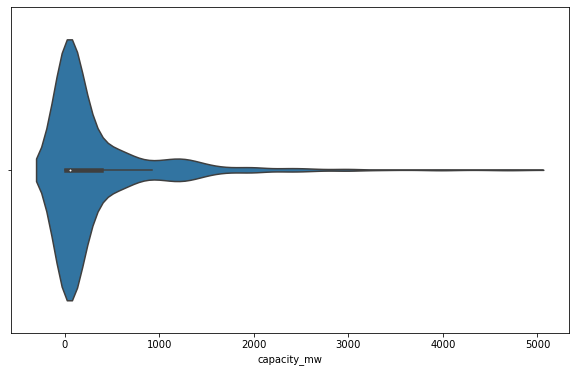

In [22]:
plt.figure(figsize=(10,6))
sns.violinplot(pwr_plnt_df.capacity_mw)
plt.show()

We can see there are very powerplant of capacity more than 1500 MW. Let check

In [23]:
pwr_plnt_df.loc[pwr_plnt_df.capacity_mw >1500].shape

(39, 17)

There only 15 powerplant of capacity more than 1500 MW.

In [24]:
pd.crosstab(pwr_plnt_df['capacity_mw'],pwr_plnt_df["primary_fuel"], margins=True).T.style.background_gradient(cmap='summer_r')

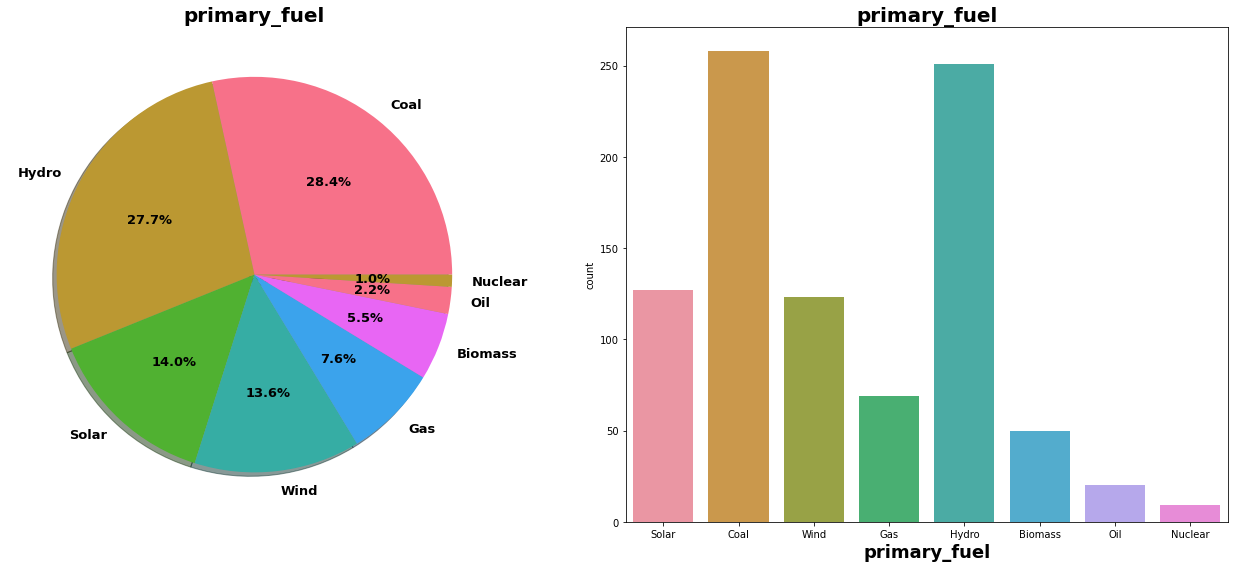

In [26]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(18,8))
pwr_plnt_df['primary_fuel'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('primary_fuel', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('primary_fuel',data=pwr_plnt_df,ax=ax[1])
ax[1].set_title('primary_fuel',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("primary_fuel",fontsize=18,fontweight ='bold')
plt.show()

In [28]:
pwr_plnt_df.primary_fuel.value_counts()


Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

### Comment:
- Maximum Number of powerplant are coal based powerplant followed by Hydro energy based powerplants.
- <b>Around 40 % Power plant are Unconventional powerplant mainly based on Non Renewable energy resorces.</b>
- There are only 9 Nuclear powerplant. Usually these powerplant build for high capacity.<b> It will be interesting to look for capacity of these powerplant.</b>

<b> Let find Total Generation capacity of all powerplant, afterwards we will look for capacity of powerplant according to fuel type.</b> 

In [29]:
print('Total Power Generation Capacity of all Power Plants:',pwr_plnt_df['capacity_mw'].sum(),'MW')

Total Power Generation Capacity of all Power Plants: 295884.946 MW


<b> India's Total Power Generation Capacity of is 291510.11 MW.

Now Let check sector wise Capacity.
</b>


In [31]:
pwr_plnt_df["capacity_mw"].groupby(pwr_plnt_df["primary_fuel"]).agg([sum])

,sum
primary_fuel,
Biomass,1003.260
Coal,205839.220
Gas,25172.506
Hydro,46441.770
Nuclear,8780.000
Oil,1778.840
Solar,2757.500
Wind,4111.850


### Observation :
Out of Total PowerGeneration Maximum comes from Coal.

Here comes another interesting observation which we already suspected. Overall Power Generation capacity of Nuclear powerplants is greater than Unconventional Energy sources based powerplant (biomass, wind,solar) combined.

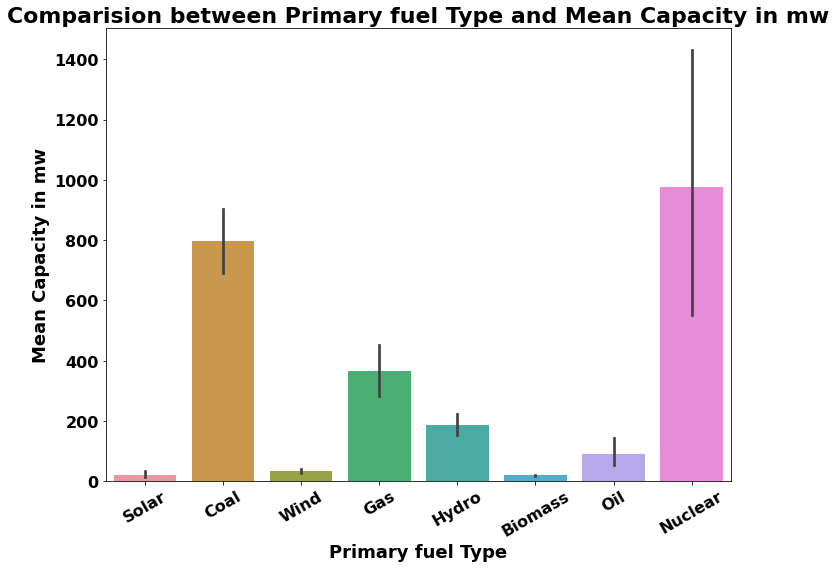

In [32]:
#Lets check the relation between primary_fuel and  Average capacity_mw
plt.figure(figsize = (10,8))
y = pwr_plnt_df["capacity_mw"]
p = sns.barplot(x = "primary_fuel", y = "capacity_mw", data = pwr_plnt_df)
plt.title('Comparision between Primary fuel Type and Mean Capacity in mw', fontsize=22, fontweight='bold')
p.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
p.set_ylabel('Mean Capacity in mw',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold',rotation=30)
plt.yticks(fontsize=16,fontweight ='bold')
plt.show()

<b> Above result is obvious as only 9 Nuclear powerplant so its mean Capacity is higher.</b>

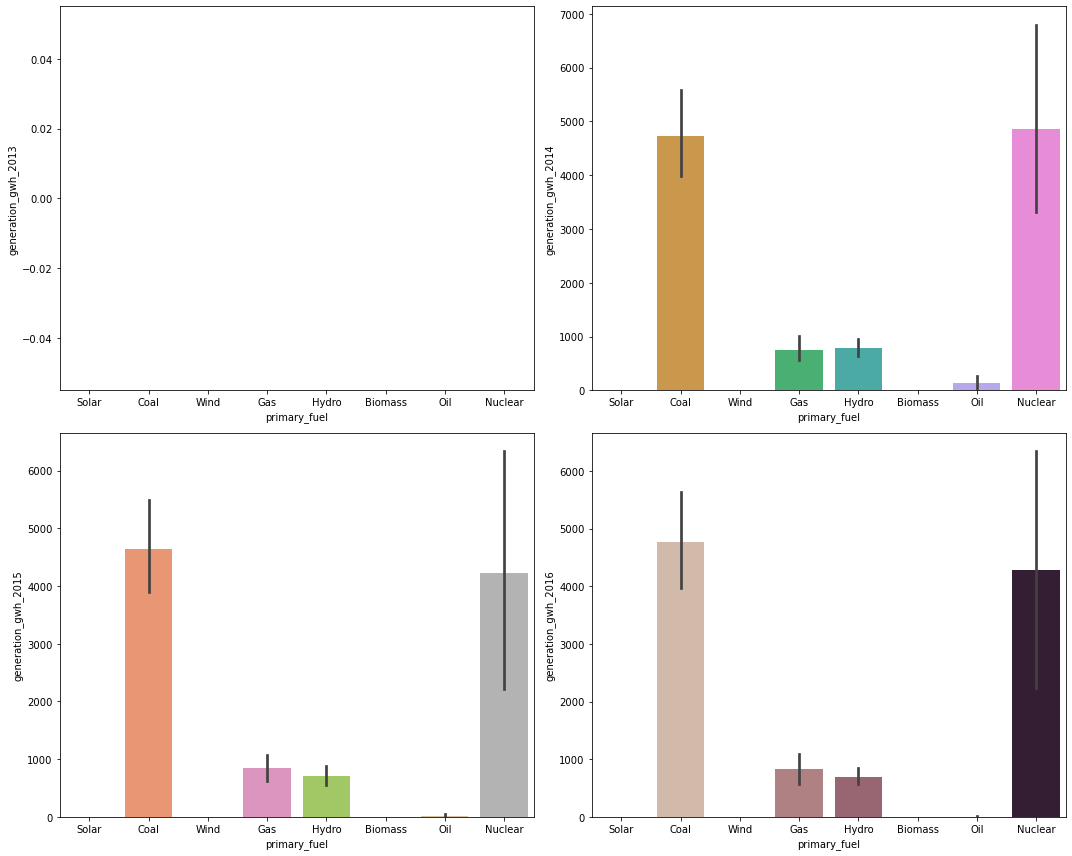

In [34]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

# Checking generation growth in 2013
sns.barplot(x='primary_fuel',y='generation_gwh_2013',ax=axes[0,0],data=pwr_plnt_df)

# Checking generation growth in 2014
sns.barplot(x='primary_fuel',y='generation_gwh_2014',ax=axes[0,1],data=pwr_plnt_df)

# Checking generation growth in 2015
sns.barplot(x='primary_fuel',y='generation_gwh_2015',ax=axes[1,0],data=pwr_plnt_df,palette="Set2")

# Checking generation growth in 2016
sns.barplot(x='primary_fuel',y='generation_gwh_2016',ax=axes[1,1],data=pwr_plnt_df,palette="ch:.25")
plt.show()

Comment:
From the graph we can see that Nuclear has high mean electrical generation reports for all the years followed by Coal. Reason is high efficieny of Nuclear powerplants.
Other fuel types have very less contribution to power generation.

## Location vs Primary Fuel

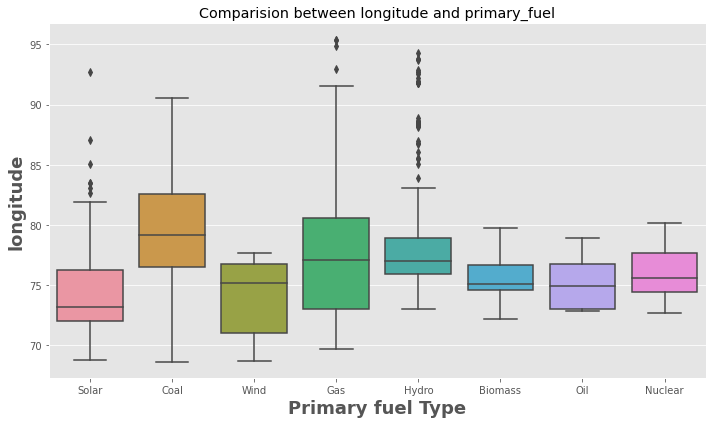

In [35]:
# Let's check how the primary_fuel is reated to longitude of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and primary_fuel')
a = sns.boxplot(pwr_plnt_df['primary_fuel'],pwr_plnt_df["longitude"])
a.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
a.set_ylabel('longitude',fontsize=18,fontweight ='bold')
plt.show()